In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Asus Vivobook 15\Desktop\heart.csv')


In [13]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df = df.drop_duplicates()

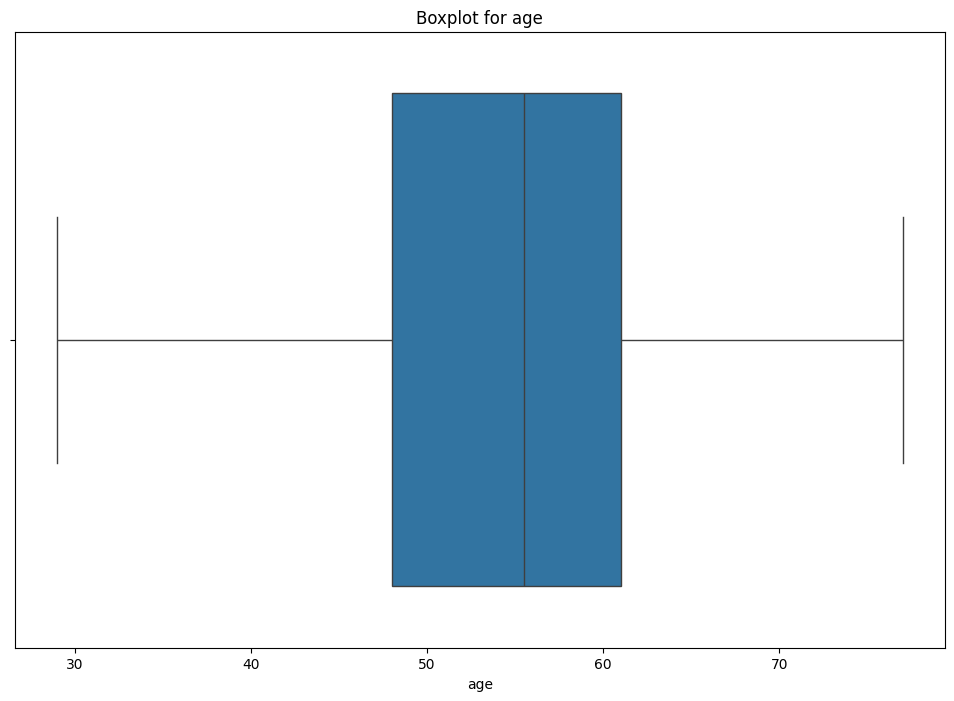

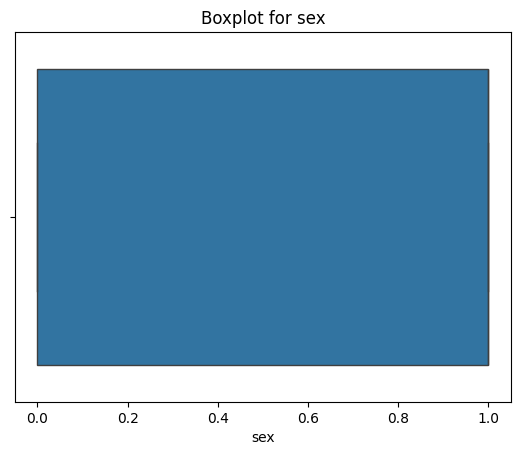

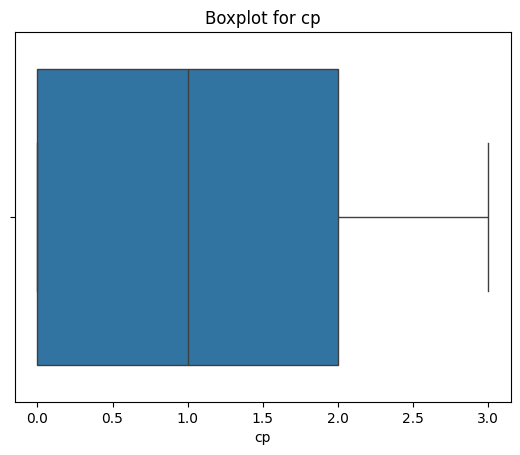

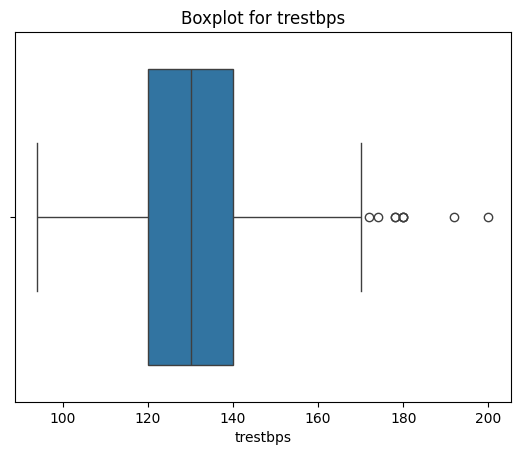

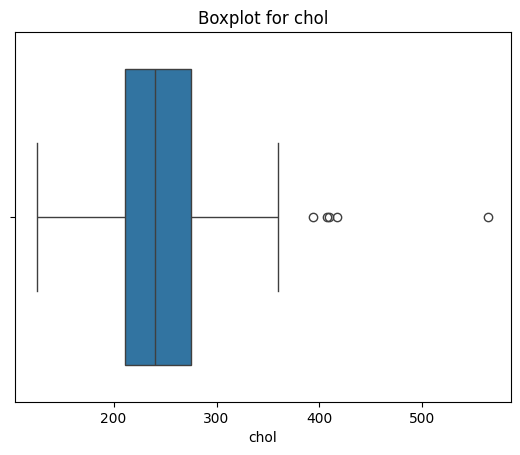

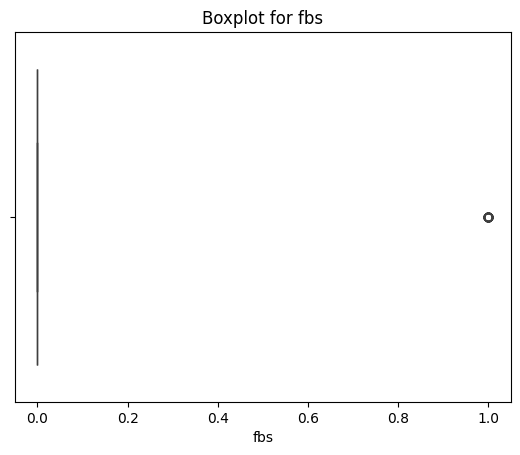

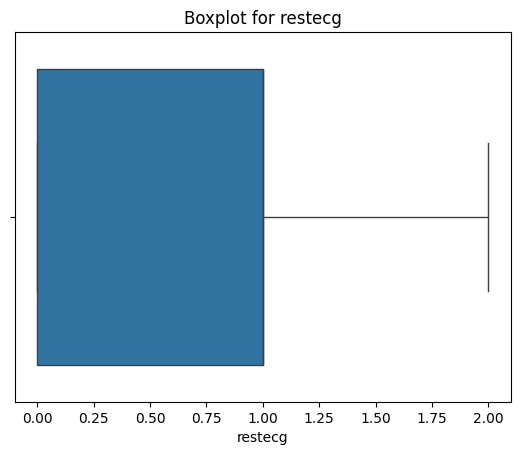

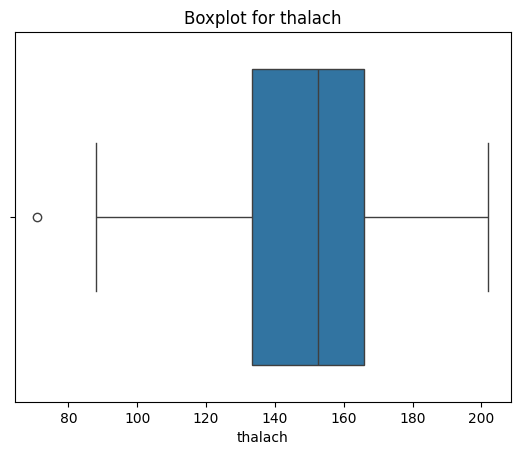

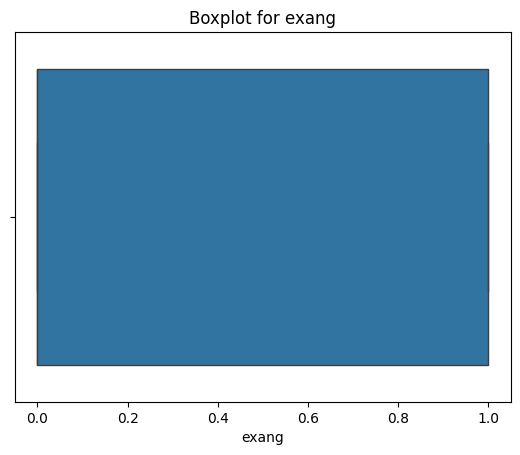

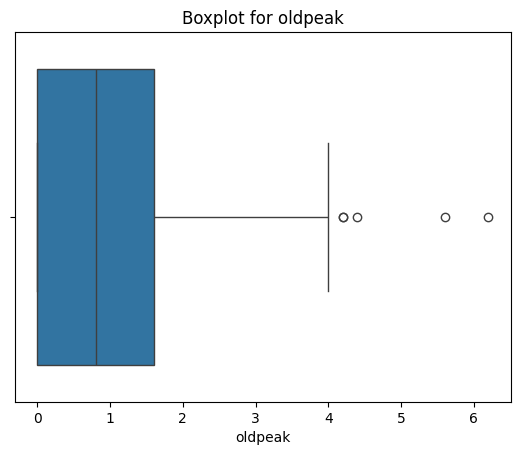

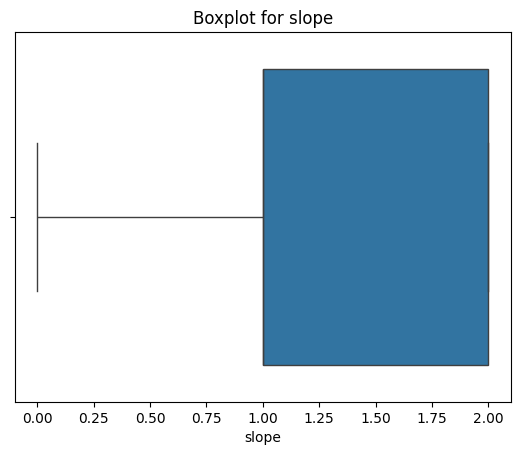

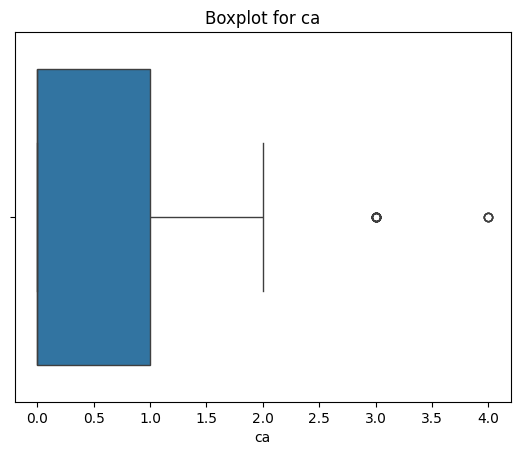

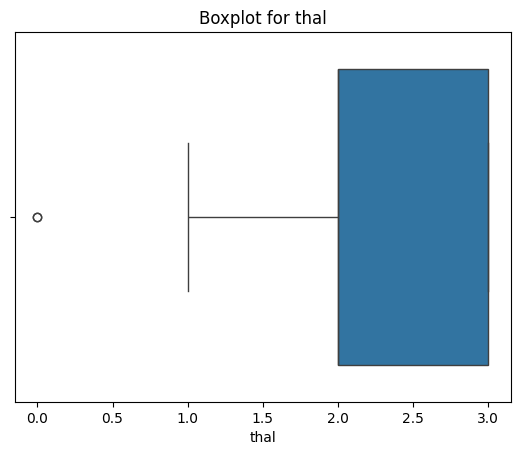

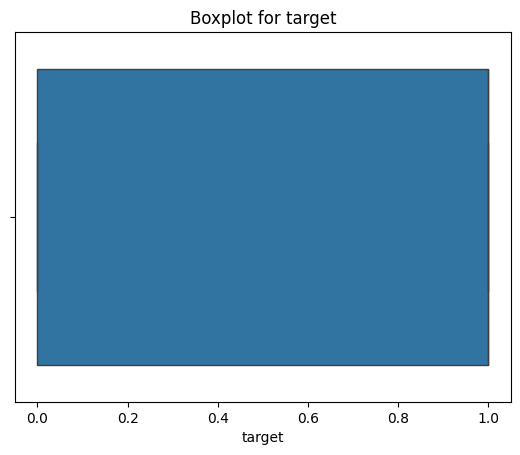

In [18]:
plt.figure(figsize=(12, 8))
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
    
    q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df ['age'] = np.clip(df['age'], lower_bound, upper_bound)

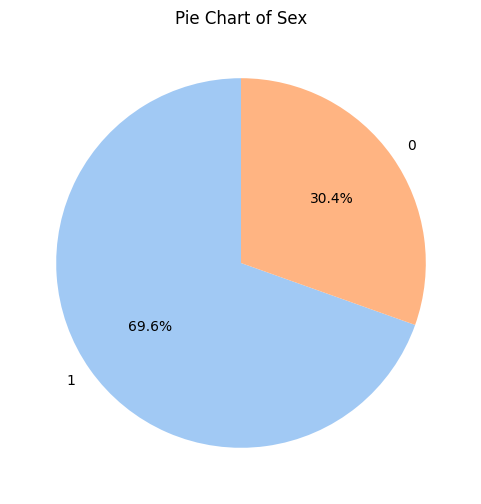

In [7]:
# Pie chart for categorical data
categorical_col = 'sex'  # Replace with your categorical column name if different
counts = df[categorical_col].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f'Pie Chart of {categorical_col.capitalize()}')
plt.show()

In [17]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df ['age'] = np.clip(df['age'], lower_bound, upper_bound)

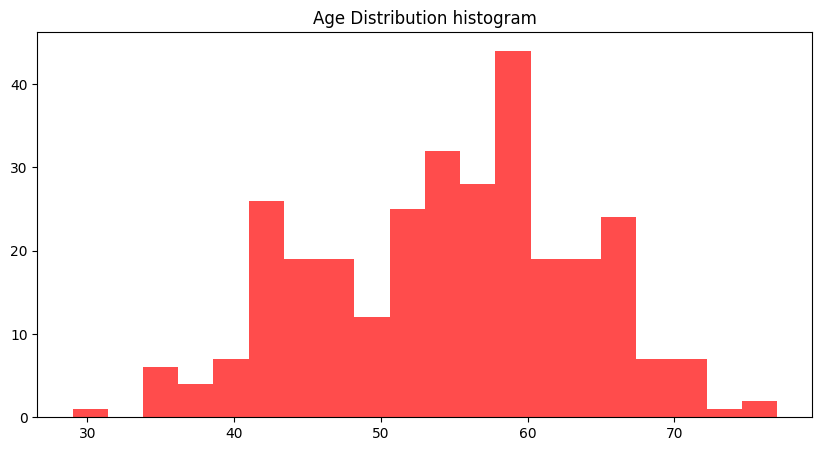

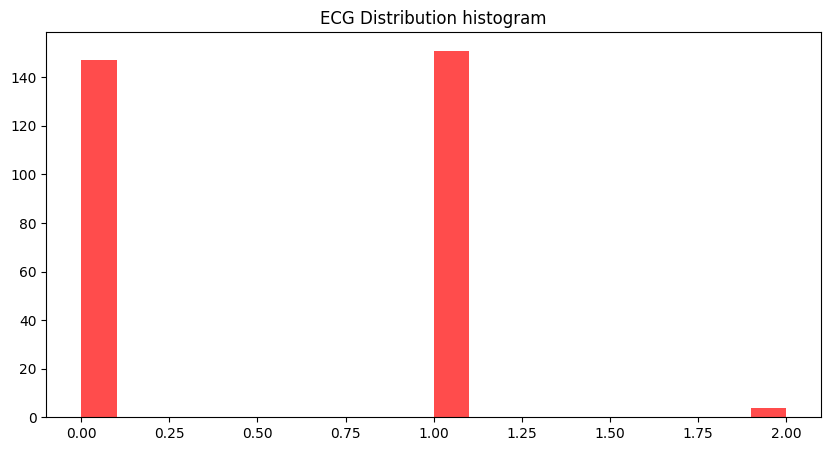

In [19]:
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins = 20, color='red', alpha=0.7)
plt.title('Age Distribution histogram')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df['restecg'], bins = 20, color='red', alpha=0.7)
plt.title('ECG Distribution histogram')
plt.show()


In [20]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [21]:
(df == 0).sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         257
restecg     147
thalach       0
exang       203
oldpeak      98
slope        21
ca          175
thal          2
target      138
dtype: int64

In [22]:
mean_age = df['age'].mean()
print(f"Mean age: {mean_age}")

Mean age: 54.420529801324506


In [23]:
print(f'Shape of dataset is :{df.shape}')

Shape of dataset is :(302, 14)


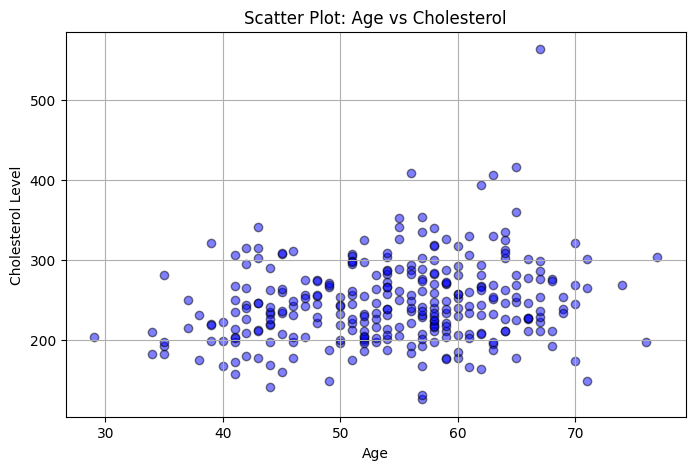

In [24]:


# Scatter plot: Age vs. Cholesterol
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['chol'], color='blue', alpha=0.5, edgecolors='black')

# Labels & Title
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Scatter Plot: Age vs Cholesterol')

# Show Grid
plt.grid(True)

# Display the plot
plt.show()



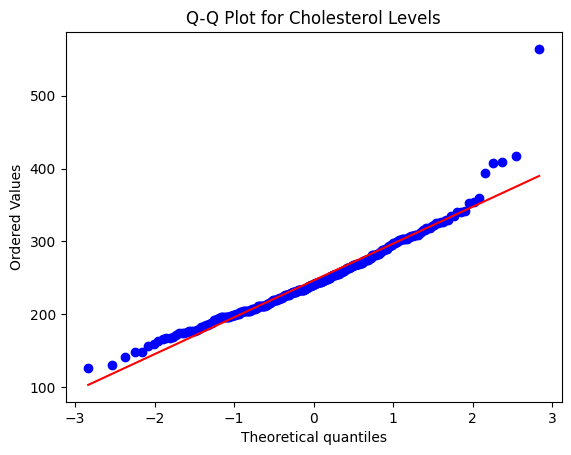

In [ ]:


# Q-Q Plot for Cholesterol Levels
stats.probplot(df['chol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Cholesterol Levels')
plt.show()


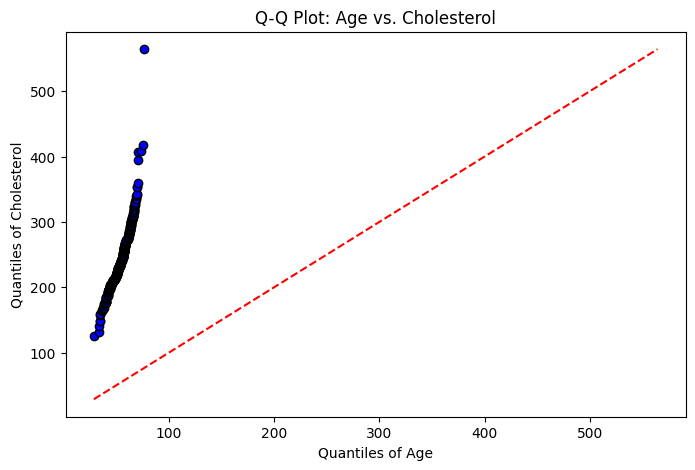

In [27]:


# Sort the data for quantile comparison
age_sorted = np.sort(df['age'])
chol_sorted = np.sort(df['chol'])

# Compute the quantiles
quantiles = np.linspace(0, 1, len(df))

# Plot Q-Q plot
plt.figure(figsize=(8, 5))
plt.scatter(np.percentile(age_sorted, quantiles * 100), np.percentile(chol_sorted, quantiles * 100), color='blue', edgecolors='black')

# Add a 45-degree reference line
min_val = min(age_sorted.min(), chol_sorted.min())
max_val = max(age_sorted.max(), chol_sorted.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="red")

# Labels & Title
plt.xlabel('Quantiles of Age')
plt.ylabel('Quantiles of Cholesterol')
plt.title('Q-Q Plot: Age vs. Cholesterol')

# Show Plot
plt.show()


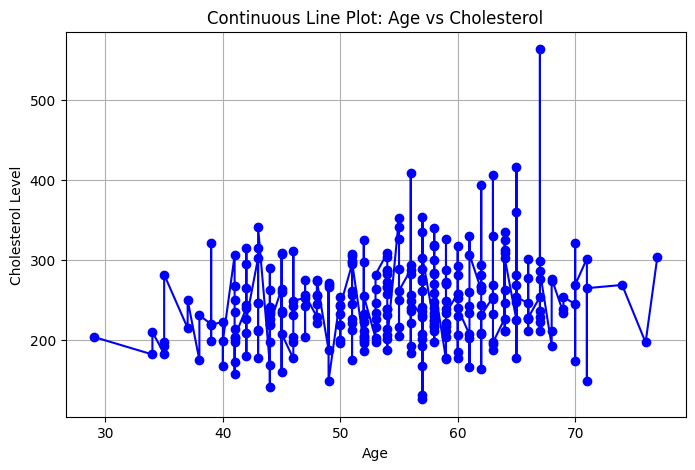

In [35]:


# Sort values to ensure a continuous trend
df_sorted = df.sort_values(by='age')

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(df_sorted['age'], df_sorted['chol'], marker='o', linestyle='-', color='blue')

# Labels & Title
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Continuous Line Plot: Age vs Cholesterol')

# Show Grid
plt.grid(True)

# Display Plot
plt.show()


In [33]:


# Calculate statistics
mean_age = df['age'].mean()
median_age = df['age'].median()
mode_age = df['age'].mode()[0]  # mode() returns a Series, so we take the first value

# Print results
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")



Mean Age: 54.420529801324506
Median Age: 55.5
Mode Age: 58


In [32]:
# Display dataset summary statistics
print(df.describe())

# Display dataset information (column types, missing values, etc.)
print(df.info())


             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4